In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(train_df.info())
print(test_df.info())

print(train_df.head())
print(test_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           8000 non-null   object 
 3   name               8000 non-null   object 
 4   size               8000 non-null   object 
 5   rating             8000 non-null   float64
 6   number_of_reviews  8000 non-null   int64  
 7   love               8000 non-null   int64  
 8   price              8000 non-null   float64
 9   value_price        8000 non-null   float64
 10  URL                8000 non-null   object 
 11  MarketingFlags     8000 non-null   bool   
 12  options            8000 non-null   object 
 13  details            8000 non-null   object 
 14  how_to_use         8000 non-null   object 
 15  ingredients        8000 non-null   object 
 16  exclusive          8000 

In [ ]:
# preprocessing dengan NLTK

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text
    return ""

train_df['name'] = train_df['name'].apply(clean_text)
train_df['details'] = train_df['details'].apply(clean_text)
test_df['name'] = test_df['name'].apply(clean_text)
test_df['details'] = test_df['details'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_df['text'] = train_df['name'] + " " + train_df['details']
test_df['text'] = test_df['name'] + " " + test_df['details']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['category_encoded'] = le.fit_transform(train_df['category'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_df['text'])
X_test = tfidf.transform(test_df['text'])

print(f"TF-IDF Train Shape: {X_train.shape}")
print(f"TF-IDF Test Shape: {X_test.shape}")

TF-IDF Train Shape: (8000, 5000)
TF-IDF Test Shape: (1164, 5000)


## Logistic Regression Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, train_df['category_encoded'])

predictions = model.predict(X_test)

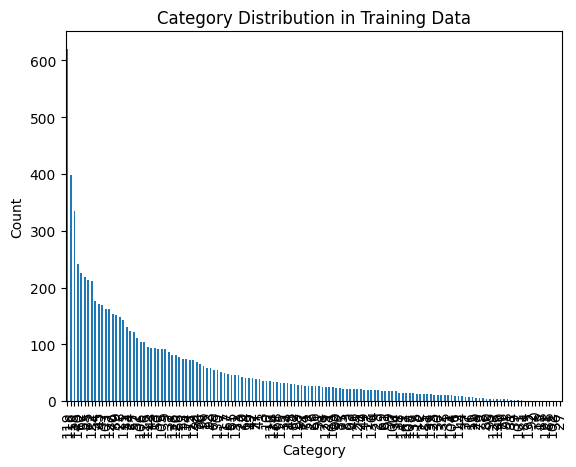

In [ ]:
import matplotlib.pyplot as plt

train_df['category_encoded'].value_counts().plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution in Training Data")
plt.show()

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(train_df['category_encoded']), y=train_df['category_encoded'])
weights_dict = dict(enumerate(class_weights))

model = LogisticRegression(max_iter=500, class_weight=weights_dict)
model.fit(X_train, train_df['category_encoded'])


LogisticRegression(class_weight={0: np.float64(56.33802816901409),
                                 1: np.float64(28.169014084507044),
                                 2: np.float64(4.333694474539545),
                                 3: np.float64(1.5649452269170578),
                                 4: np.float64(2.965159377316531),
                                 5: np.float64(5.633802816901408),
                                 6: np.float64(6.259780907668231),
                                 7: np.float64(1.1046672190002762),
                                 8: np.float64(11.267605633802816),
                                 9: np.float64(0.6123698714...
                                 20: np.float64(1.3101867016049786),
                                 21: np.float64(2.2535211267605635),
                                 22: np.float64(2.682763246143528),
                                 23: np.float64(2.965159377316531),
                                 24: np.float64(0.45803274934157795),
                                 25: np.float64(5.121638924455826),
                                 26: np.float64(2.1668472372697725),
                                 27: np.float64(56.33802816901409),
                                 28: np.float64(0.3806623524933384),
                                 29: np.float64(9.389671361502348), ...},
                   max_iter=500)

In [ ]:
model.fit(X_train, train_df['category_encoded'])

LogisticRegression(class_weight={0: np.float64(56.33802816901409),
                                 1: np.float64(28.169014084507044),
                                 2: np.float64(4.333694474539545),
                                 3: np.float64(1.5649452269170578),
                                 4: np.float64(2.965159377316531),
                                 5: np.float64(5.633802816901408),
                                 6: np.float64(6.259780907668231),
                                 7: np.float64(1.1046672190002762),
                                 8: np.float64(11.267605633802816),
                                 9: np.float64(0.6123698714...
                                 20: np.float64(1.3101867016049786),
                                 21: np.float64(2.2535211267605635),
                                 22: np.float64(2.682763246143528),
                                 23: np.float64(2.965159377316531),
                                 24: np.float64(0.45803274934157795),
                                 25: np.float64(5.121638924455826),
                                 26: np.float64(2.1668472372697725),
                                 27: np.float64(56.33802816901409),
                                 28: np.float64(0.3806623524933384),
                                 29: np.float64(9.389671361502348), ...},
                   max_iter=500)

In [ ]:
from sklearn.metrics import classification_report

y_train_pred = model.predict(X_train)
print(classification_report(train_df['category_encoded'], y_train_pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      1.00      1.00         2
           2       0.87      1.00      0.93        13
           3       0.89      0.89      0.89        36
           4       0.78      0.95      0.86        19
           5       0.77      1.00      0.87        10
           6       0.42      0.89      0.57         9
           7       0.71      0.69      0.70        51
           8       0.62      1.00      0.77         5
           9       0.92      0.97      0.94        92
          10       0.38      0.94      0.54        35
          11       0.78      1.00      0.88         7
          12       0.89      0.93      0.91        59
          13       0.88      0.63      0.74        93
          14       0.40      0.90      0.55        31
          15       1.00      1.00      1.00         1
          16       0.78      1.00      0.88         7
          17       0.67    

In [ ]:
predictions = model.predict(X_test)
test_df['predicted_category'] = le.inverse_transform(predictions)

print(test_df[['name', 'category', 'predicted_category']].head(10))

                                                name           category  \
0                             brow zings pro palette       Eye Palettes   
1              full frontal volume lift curl mascara            Mascara   
2  clementine california cologne absolue pure per...  Perfume Gift Sets   
3  orange sanguine cologne absolue pure perfume l...  Perfume Gift Sets   
4  pacific lime cologne absolue pure perfume leat...  Perfume Gift Sets   
5  vanille insensée cologne absolue pure perfume ...  Perfume Gift Sets   
6                  satin luxe classic cream lipstick           Lipstick   
7                       little one eyeshadow palette       Eye Palettes   
8                      bois de balincourt votive set  Perfume Gift Sets   
9               prism aha bha exfoliating glow serum        Face Serums   

      predicted_category  
0        Makeup Palettes  
1                Mascara  
2      Perfume Gift Sets  
3                Perfume  
4      Perfume Gift Sets  
5      Perfu